# *Exploratory Data Analysis*

We're analyzing 3 datasets from US Census
1. Income in the past 12 months
2. Poverty Status in the past 12 months
3. Median Gross Rent

They are all data for all states, therefore we can combine them into one dataframe once they have been cleaned. 

In [1]:
#import google drive content so we can access csvs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from functools import reduce
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [3]:
#Import Datasets

#dataset 1: Income in the past 12 months
df_income = pd.read_csv("/content/drive/MyDrive/DS4A/DS4A Team 14 - Fall 2022/EDA/Data and Notebook/CENSUS_INCOME_POVERTY/INCOME IN THE PAST 12 MONTHS (IN 2021 INFLATION-ADJUSTED DOLLARS).csv", delimiter=',')

#dataset 2: Poverty Status in the  past 12 months
df_poverty = pd.read_csv("/content/drive/MyDrive/DS4A/DS4A Team 14 - Fall 2022/EDA/Data and Notebook/CENSUS_INCOME_POVERTY/POVERTY STATUS IN THE PAST 12 MONTHS.csv", delimiter=',')

#dataset 3:Median Gross Rent
df_rent = pd.read_csv("/content/drive/MyDrive/DS4A/DS4A Team 14 - Fall 2022/EDA/Data and Notebook/CENSUS_INCOME_POVERTY/MEDIAN GROSS RENT BY BEDROOM.csv", delimiter=',')

# Cleaning Columns





In [4]:
#dataset 1: Income in past 12 months
#first create a copy of the dataframe incase we need to resue the full dataframe
df_income_clean=df_income

#create a list of the columns we want to drop
omit_names = ['.*Families*.',
              '.*Married-couple*.',
              '.*Nonfamily households*.']

#iterate through the list and remove the columns
for item in omit_names:
  mask = df_income_clean.columns.str.contains(item)
  df_income_clean = df_income_clean.loc[:,~mask] #use the inverse of the mask to keep the columns that are False

#clean column names
df_income_clean.columns = df_income_clean.columns.str.strip().str.lower().str.replace('!!households!!estimate', '')
df_income_clean = df_income_clean.drop(columns = ['puerto rico', 'united states', 'district of columbia'])
df_income_clean.head(2)

,label (grouping),alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,Total,"1,967,559","271,311","2,817,723","1,183,675","13,429,063","2,313,042","1,428,313","395,656","8,565,329",...,"356,887","2,770,395","10,796,247","1,101,499","270,163","3,331,461","3,022,255","722,201","2,449,970","242,763"
1,"Less than $10,000",7.7%,5.4%,5.6%,7.6%,5.3%,4.8%,5.2%,5.2%,6.3%,...,4.8%,6.6%,6.1%,4.3%,4.1%,5.0%,4.8%,8.4%,4.8%,6.0%


In [5]:
#dataset 2: Poverty Status in the  past 12 months
#first create a copy of the dataframe incase we need to resue the full dataframe
df_poverty_clean=df_poverty

#craete a list of the columns we wnat to drop
omit_names = ['.*!!Total!!*.',
              '.*!!Below poverty level!!Estimate*.']

#iterate thru the list and remove the columns
for item in omit_names:
  mask = df_poverty_clean.columns.str.contains(item)
  df_poverty_clean = df_poverty_clean.loc[:,~mask] #use the inverse of the mask to keep the columns that are False

# clean column names
df_poverty_clean.columns = df_poverty_clean.columns.str.strip().str.lower().str.replace('!!percent below poverty level!!estimate', '')
df_poverty_clean = df_poverty_clean.drop(columns = ['puerto rico', 'united states', 'district of columbia'])

df_poverty_clean.head(2)

,label (grouping),alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,Population for whom poverty status is determined,16.1%,10.5%,12.8%,16.3%,12.3%,9.7%,10.1%,11.6%,13.1%,...,12.3%,13.6%,14.2%,8.6%,10.3%,10.2%,9.9%,16.8%,10.8%,11.4%
1,AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#first create a copy of the dataframe incase we need to resue the full dataframe
df_rent_clean = df_rent
# clean column names
df_rent_clean.columns = df_rent_clean.columns.str.strip().str.lower().str.replace('!!estimate', '')
df_rent_clean = df_rent_clean.drop(columns = ['puerto rico', 'united states', 'district of columbia'])
df_rent_clean.head(2)

,label (grouping),alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,Median gross rent --,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total:,861,"1,259","1,253",820,"1,750","1,491","1,277","1,208","1,348",...,830,981,"1,167","1,208","1,115","1,331","1,484",767,921,889


# Transpose Dataset

In [7]:
#transposing all datasets
df_income_transpose = df_income_clean.transpose()
df_poverty_transpose = df_poverty_clean.transpose()
df_rent_transpose = df_rent_clean.transpose()

In [8]:
# correct first column name for each dataset
#Dataset 1
income_data = df_income_transpose.rename(columns=df_income_transpose.iloc[0])
income_data = income_data.drop(index="label (grouping)", axis=0)

#Dataset 2
poverty_data = df_poverty_transpose.rename(columns=df_poverty_transpose.iloc[0])
poverty_data = poverty_data.drop(index="label (grouping)", axis=0)

#Dataset 3
rent_data = df_rent_transpose.rename(columns=df_rent_transpose.iloc[0]) 
rent_data = rent_data.drop(index="label (grouping)", axis=0)

# Clean Transposed Data

In [9]:
#Dataset 1
#clean income data
income_data = income_data[['Median income (dollars)','Mean income (dollars)']]
income_data.columns= income_data.columns.str.strip().str.lower()
income_data =income_data.reset_index()
income_data = income_data.rename(columns={'index': 'state'})
income_data.head(1)

,state,median income (dollars),mean income (dollars)
0,alabama,"53,913","75,923"


In [10]:
#Dataset 2
#Clean Poverty Data
poverty_data = poverty_data[['Population for whom poverty status is determined']]
poverty_data.columns= poverty_data.columns.str.strip().str.lower()
poverty_data =poverty_data.reset_index()
poverty_data = poverty_data.rename(columns={'index': 'state'})
poverty_data.head(1)

,state,population for whom poverty status is determined
0,alabama,16.1%


In [11]:
#Dataset 3
#Clean Rent Data
rent_data.columns= rent_data.columns.str.strip().str.lower()
rent_data =rent_data.reset_index()
rent_data = rent_data.rename(columns={'index': 'state','median gross rent --': 'delete', 'total:': 'median gross rent'})
rent_data =rent_data.drop(columns=['delete','no bedroom', '1 bedroom', '2 bedrooms','3 bedrooms', '4 bedrooms', '5 or more bedrooms'])
rent_data.head(1)

,state,median gross rent
0,alabama,861


#Explore New Datasets

In [12]:
print(income_data.info())
nan = income_data['median income (dollars)'].isnull().values.ravel().sum()
nan2= income_data['mean income (dollars)'].isnull().values.ravel().sum()
print("There are %d median and %d mean rows with no data." % (nan, nan2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   state                    50 non-null     object
 1   median income (dollars)  50 non-null     object
 2   mean income (dollars)    50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
None
There are 0 median and 0 mean rows with no data.


In [13]:
print(poverty_data.info())
nan = poverty_data['population for whom poverty status is determined'].isnull().values.ravel().sum()
print("There are %d rows with no data." % (nan))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   state                                             50 non-null     object
 1   population for whom poverty status is determined  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes
None
There are 0 rows with no data.


In [14]:
print(rent_data.info())
nan = rent_data['median gross rent'].isnull().values.ravel().sum()
print("There are %d rows with no data." % (nan))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              50 non-null     object
 1   median gross rent  50 non-null     object
dtypes: object(2)
memory usage: 928.0+ bytes
None
There are 0 rows with no data.


#  Merge with only rows we want


In [15]:
# compile the list of dataframes we want to merge
data_frames = [income_data, poverty_data, rent_data]

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['state'],how='outer'), data_frames) 

df_merged.head(3)

,state,median income (dollars),mean income (dollars),population for whom poverty status is determined,median gross rent
0,alabama,"53,913","75,923",16.1%,861
1,alaska,"77,845","100,519",10.5%,"1,259"
2,arizona,"69,056","93,177",12.8%,"1,253"


#Clean Merged Data

In [16]:
#clean Merged data
#first create a copy of the dataframe incase we need to resue the full dataframe
census = df_merged
#Rename columns to simple names
census = census.rename(columns={'median income (dollars)': 'median_income',
                                'mean income (dollars)': 'mean_income', 
                                'population for whom poverty status is determined': 'percent_poverty',
                                'median gross rent': 'median_gross_rent'
                                })

census.columns

Index(['state', 'median_income', 'mean_income', 'percent_poverty',
       'median_gross_rent'],
      dtype='object')

In [17]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   state              50 non-null     object
 1   median_income      50 non-null     object
 2   mean_income        50 non-null     object
 3   percent_poverty    50 non-null     object
 4   median_gross_rent  50 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


In [18]:
#Clean Data Types
census['state'] = census['state'].astype('string')
census['median_income'] = census['median_income'].str.replace(',', '').astype(float)
census['mean_income'] = census['mean_income'].str.replace(',', '').astype(float)
census['percent_poverty'] = census['percent_poverty'].str.replace('%', '').astype(float)
census['median_gross_rent'] = census['median_gross_rent'].str.replace(',', '').astype(float)

In [19]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              50 non-null     string 
 1   median_income      50 non-null     float64
 2   mean_income        50 non-null     float64
 3   percent_poverty    50 non-null     float64
 4   median_gross_rent  50 non-null     float64
dtypes: float64(4), string(1)
memory usage: 2.3 KB


In [20]:
census.describe()

,median_income,mean_income,percent_poverty,median_gross_rent
count,50.000000,50.000000,50.000000,50.000000
mean,68826.880000,93757.300000,12.540000,1106.100000
std,11026.532015,14708.304926,2.649682,254.137858
min,48716.000000,68048.000000,7.200000,767.000000
25%,62382.250000,85213.250000,10.800000,892.750000
50%,66539.000000,89764.000000,12.100000,1035.500000
75%,76868.500000,102608.500000,13.825000,1273.500000
max,90203.000000,124951.000000,19.600000,1774.000000


In [29]:
from google.colab import files
census.to_csv('census_income_cleaned.csv')
files.download('census_income_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visual exploration of Data

Text(0.5, 1.0, 'income metrics per state')

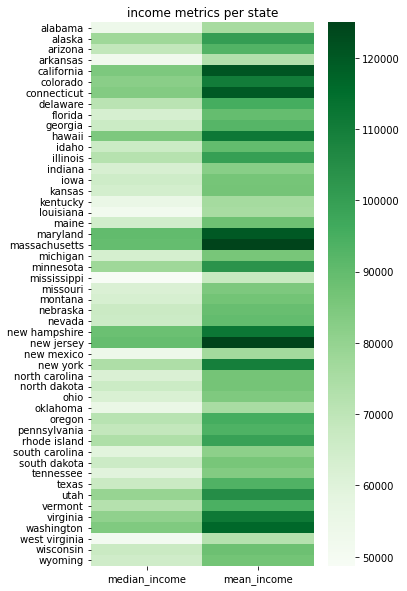

In [21]:
#Heat Map Median Income 
 

census_income= census[['median_income','mean_income']]

fig, ax = plt.subplots(figsize=(5, 10))
ax = sns.heatmap(census_income,yticklabels=census['state'], cmap="Greens")
ax.set(ylabel="")
ax.set_title("income metrics per state")

Text(0.5, 1.0, 'Cost of living per state')

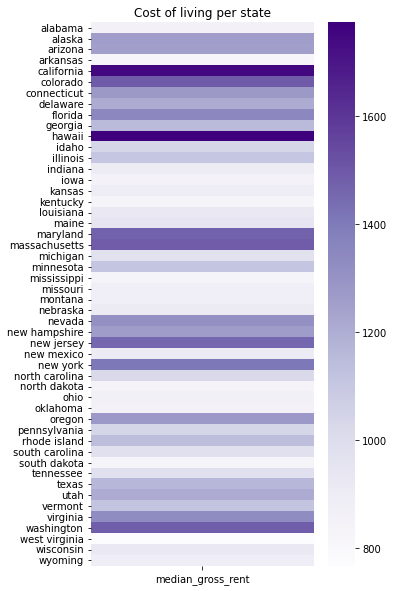

In [22]:
#Heat Map Median Gross Rent

census_rent= census[['median_gross_rent']]

fig, ax = plt.subplots(figsize=(5, 10))
ax = sns.heatmap(census_rent,yticklabels=census['state'], cmap="Purples")
ax.set(ylabel="")
ax.set_title("Cost of living per state")

Text(0.5, 1.0, 'percent living below poverty per state')

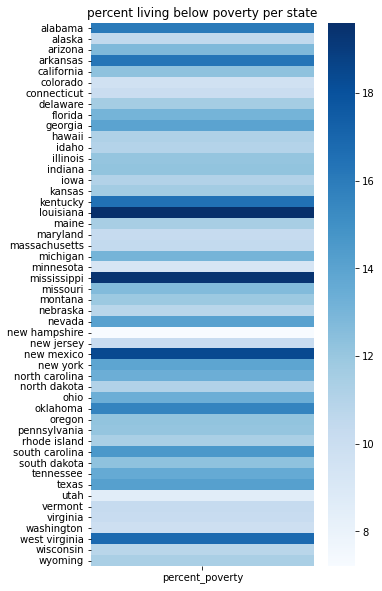

In [23]:
#Heat Map Percent Poverty 

census_poverty= census[['percent_poverty']]

fig, ax = plt.subplots(figsize=(5, 10))
ax = sns.heatmap(census_poverty,yticklabels=census['state'], cmap="Blues")
ax.set(ylabel="")
ax.set_title("percent living below poverty per state")

Other graphics

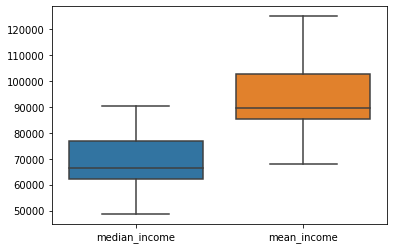

In [24]:
#box plot income 

sns.boxplot(data = census[['median_income','mean_income']])


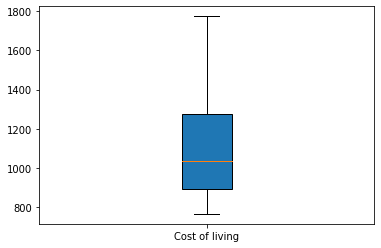

In [25]:
#box plot median gross rent
census2= census.dropna()
fig, ax = plt.subplots()
columns = census2['median_gross_rent']
ax.boxplot(columns, patch_artist=True)
plt.xticks([1], ["Cost of living"])
plt.show()


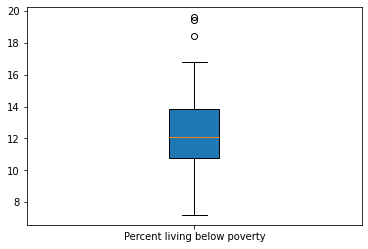

In [26]:
#box plot living below poverty levels
fig, ax = plt.subplots()
columns = census['percent_poverty']
ax.boxplot(columns, patch_artist=True)
plt.xticks([1], ['Percent living below poverty'])
plt.show()
